In [150]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fatscarbsfooddatabase/Fat-Cabs-Foods-raw.csv


In [151]:
df = pd.read_csv("/kaggle/input/fatscarbsfooddatabase/Fat-Cabs-Foods-raw.csv")

# **Data Visualization**

In [152]:
df=df.iloc[:,1:]
df.head()

,name,calories,water,carborhyrate_total,free_saccharides_total,fructose_free,glucose_free,sucrose_free,maltose_free,lactose_free,...,FA_20:3_n-3,FA_20:4_n-6,FA_20:5_n-3,FA_22:0,FA_22:1_n-9,FA_22:4_n-6,FA_22:5_n-3,FA_22:6_n-3,FA 24:0,FA_24:1_n-9
0,Milk 2% Fat,29.23,89.22g,3.5564g,3.2777g,0g,0g,0g,0g,3.2777g,...,0.0022g,0.0103g,0g,0g,0g,0g,0g,0g,0g,0g
1,Mixed Cheese,212.19,41.6g,6.8188g,4.9411g,0g,0g,0g,0g,4.9411g,...,0.0323g,0.1401g,0g,0g,0g,0g,0.0121g,0.0187g,0g,0g
2,Plain Yogurt,42.29,82.39g,4.5203g,2.8995g,0g,0g,0g,0g,2.8995g,...,0g,0.0857g,0g,0.0109g,0g,0g,0g,0.049g,0.0039g,0g
3,Buttermilk,25.55,90.32g,4.9445g,4.8085g,0g,0g,0g,0g,4.8085g,...,0g,0.0036g,0g,0g,0g,0g,0g,0g,0g,0g
4,Apple,39.21,85.21g,9.7032g,8.9358g,5.6916g,2.0531g,1.191g,0g,0g,...,0g,0g,0g,0g,0g,0g,0g,0g,0g,0g


In [153]:
for a in df.columns[2:]:
    df[a] = [float(a.split("g")[0]) for a in df[a]]

In [154]:
df.info()
df.describe()
df.columns
df.corr()
df.index=df.name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         35 non-null     object 
 1   calories                     35 non-null     float64
 2   water                        35 non-null     float64
 3   carborhyrate_total           35 non-null     float64
 4   free_saccharides_total       35 non-null     float64
 5   fructose_free                35 non-null     float64
 6   glucose_free                 35 non-null     float64
 7   sucrose_free                 35 non-null     float64
 8   maltose_free                 35 non-null     float64
 9   lactose_free                 35 non-null     float64
 10  melibiose_free               35 non-null     float64
 11  kestose_free                 35 non-null     float64
 12  raffinose_free               35 non-null     float64
 13  isomaltotriose_free   

In [155]:
df["Total_Carbs_percent"]=((df["carborhyrate_total"]*4)/df["calories"])*100
df["Saccharides_percent"]=((df["free_saccharides_total"]*4)/df["calories"])*100
df["Fibres_percent"]     =((df["fibers_total"]*4)/df["calories"])*100
df["Fats_percent"]       =((df["fat_total"]*9)/df["calories"])*100
df["Saturated_fatty_acids_percent"]      =((df["saturated_fatty_acids"]*9)/df["calories"])*100
df["Monounsaturated_fatty_acids_percent"]=((df["monounsaturated_fatty_acids"]*9)/df["calories"])*100
df["Fatty_acids_trans_percent"]          =((df["fatty_acids_total_trans"]*9)/df["calories"])*100

In [156]:
df.iloc[:,[1,-7,-6,-5,-4,-3,-2,-1]]

,calories,Total_Carbs_percent,Saccharides_percent,Fibres_percent,Fats_percent,Saturated_fatty_acids_percent,Monounsaturated_fatty_acids_percent,Fatty_acids_trans_percent
name,,,,,,,,
Milk 2% Fat,29.23,48.667807,44.853917,3.813890,51.333561,35.482723,11.121451,2.731098
Mixed Cheese,212.19,12.854140,9.314482,3.539469,87.144210,53.461756,22.953626,6.626467
Plain Yogurt,42.29,42.755261,27.424923,15.330338,57.249704,8.559470,30.243320,2.306928
Buttermilk,25.55,77.409002,75.279843,2.129159,22.575734,15.171429,5.600783,1.077886
Apple,39.21,98.986993,91.158378,7.828615,1.019128,0.374139,0.557766,0.000000
Pineapple,34.53,99.172893,93.800174,5.372719,0.841877,0.294526,0.448306,0.000000
Grapes,70.02,100.001143,98.362753,1.638389,0.000000,0.000000,0.000000,0.000000
Potatoes,30.26,99.102445,10.030403,89.073364,0.907138,0.562128,0.345010,0.000000
Sweet Potatoes,48.53,97.940243,39.586235,58.354008,2.051102,1.936122,0.000000,0.000000


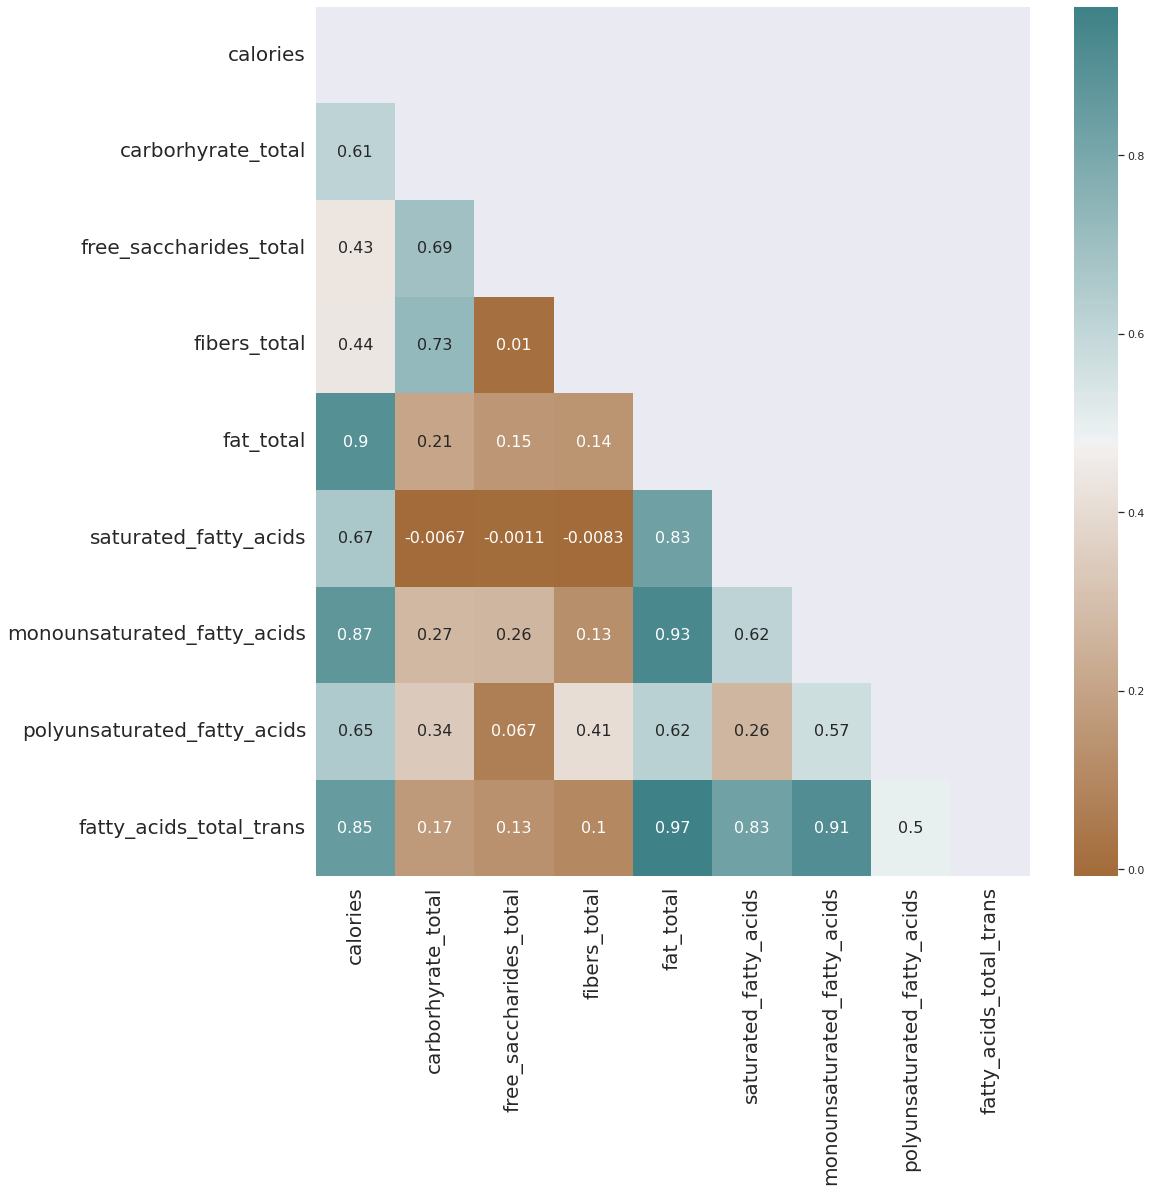

In [157]:
corr = df.iloc[:,[1,3,4,22,37,38,39,40,41]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(40,200, as_cmap=True)
plt.figure(figsize=(16,16))
sns.heatmap(corr,annot=True,mask=mask,cmap=cmap,annot_kws={"size":16})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20,rotation=0)
plt.show()

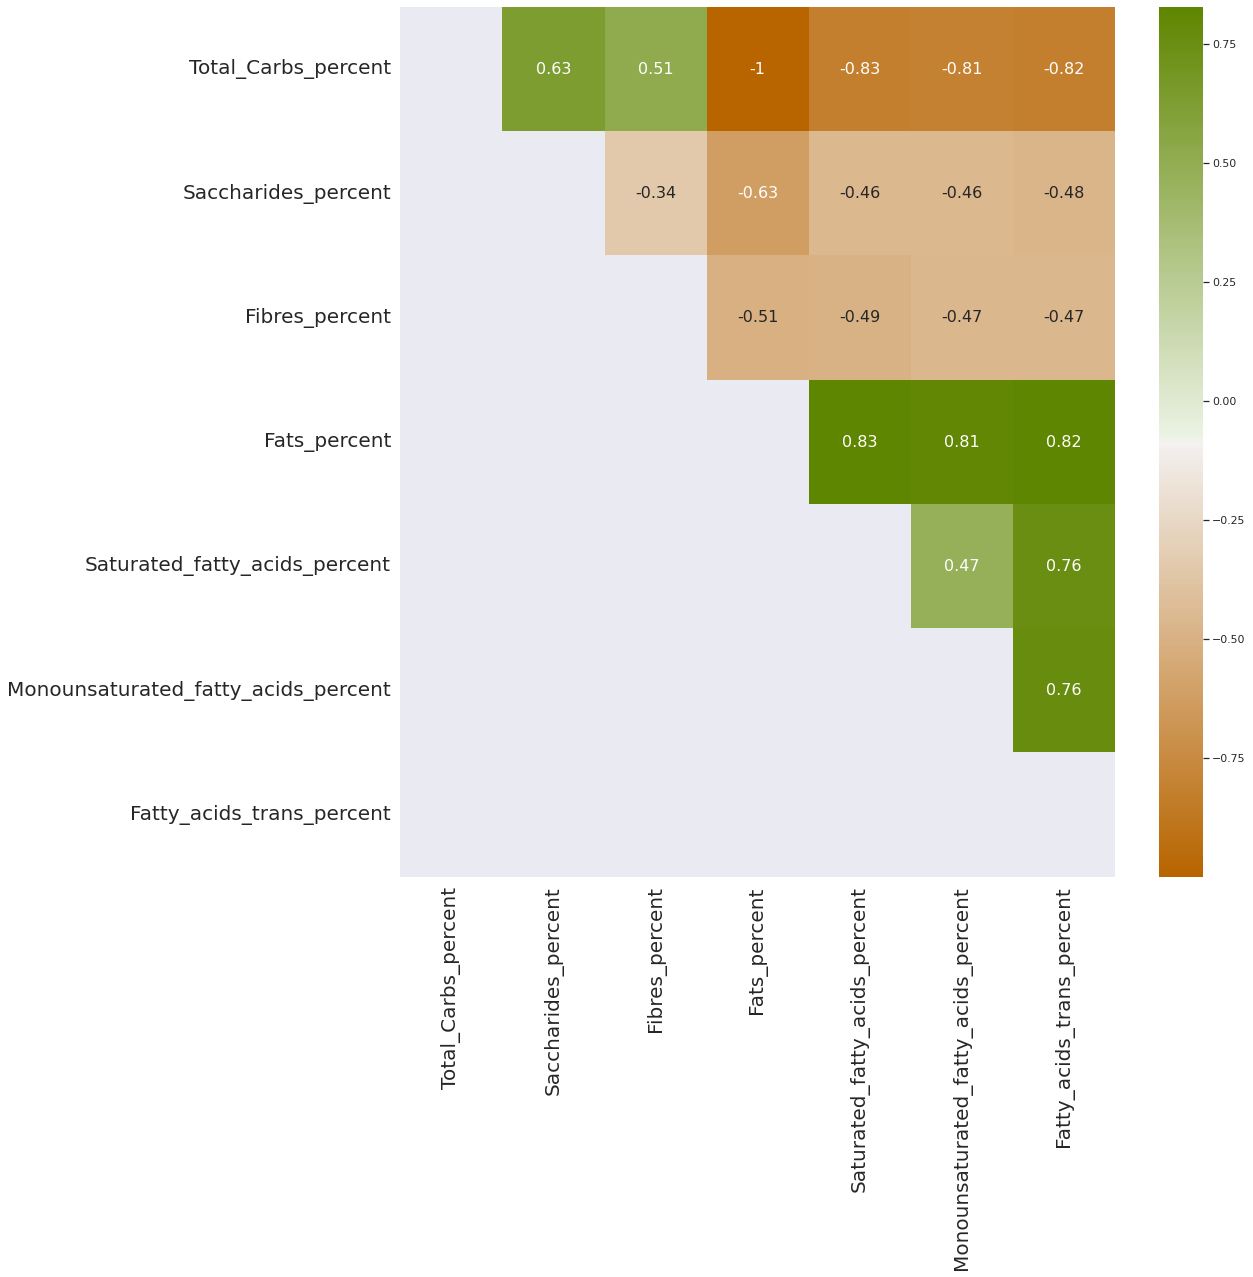

In [158]:
corr = df.iloc[:,[-7,-6,-5,-4,-3,-2,-1]].corr()
mask = np.tril(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(50,100,200, as_cmap=True)
plt.figure(figsize=(16,16))
sns.heatmap(corr,annot=True,mask=mask,cmap=cmap,annot_kws={"size":16})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20,rotation=0)
plt.show()

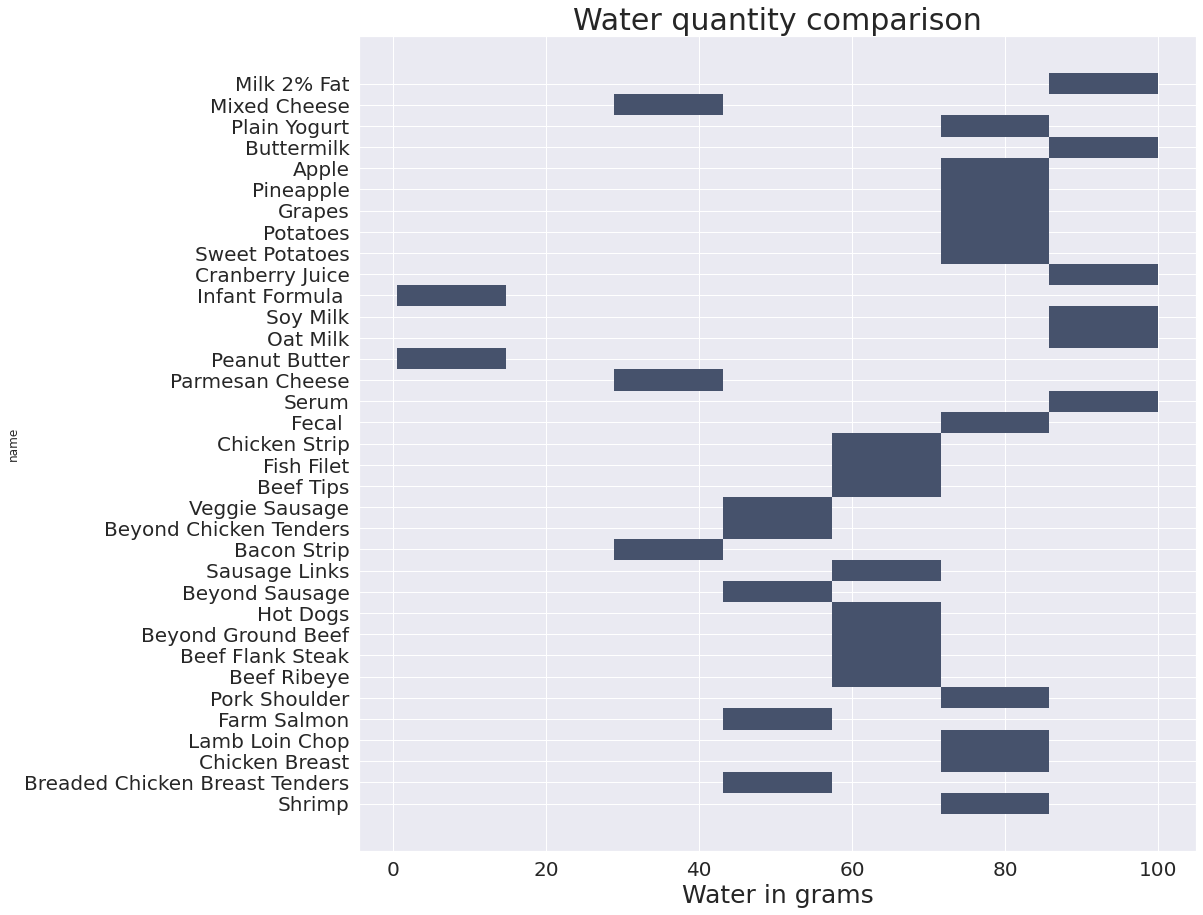

In [159]:
plt.figure(figsize=(15,15))
sns.histplot(data=df,x="water",y="name")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Water in grams",fontsize=25)
plt.title("Water quantity comparison",fontsize=30)
plt.show()

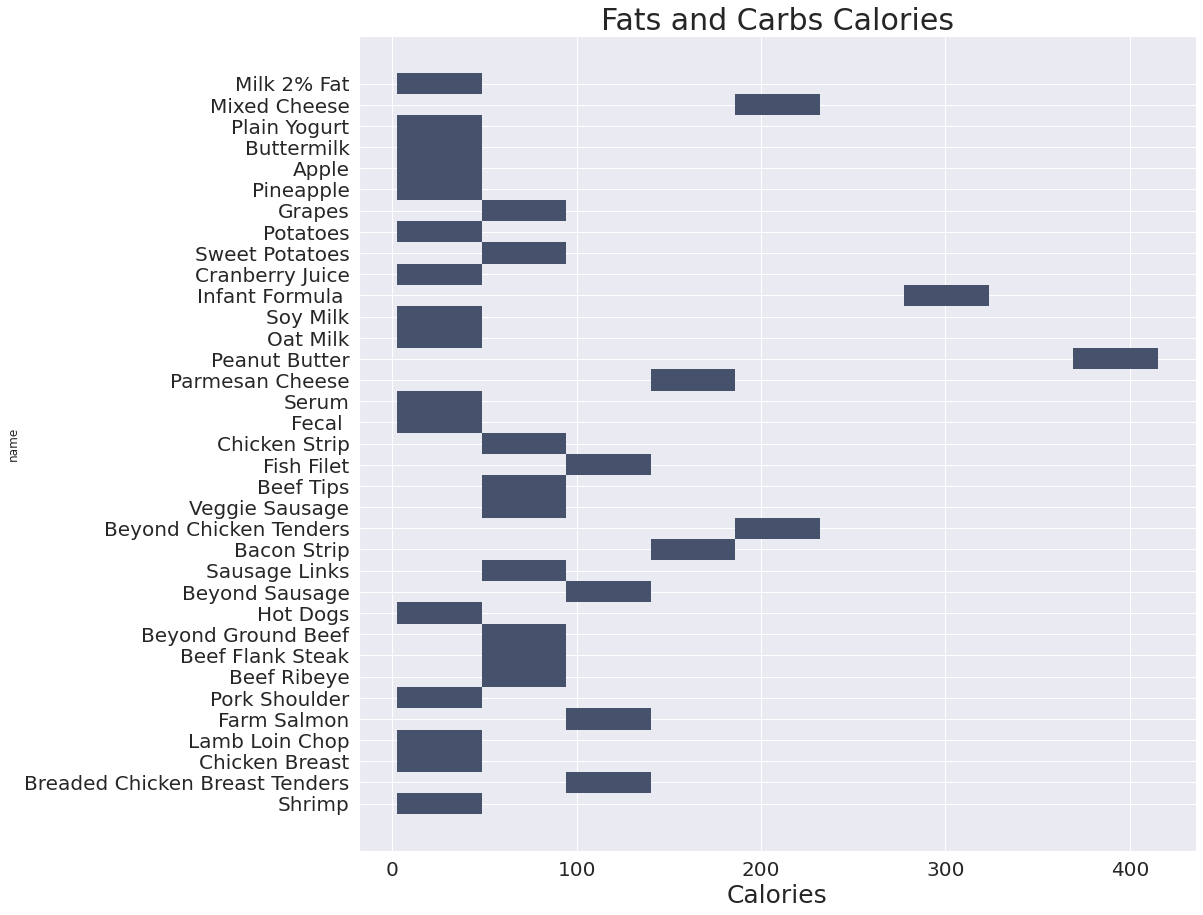

In [160]:
plt.figure(figsize=(15,15))
sns.histplot(data=df,x="calories",y="name")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Calories",fontsize=25)
plt.title("Fats and Carbs Calories",fontsize=30)
plt.show()

#These columns have constant 0 values as seen by the graph, so dropping them out
ctd = df.columns[[10,13,18,20,32,33,35,58,71]]
df.drop(ctd,axis=1,inplace=True)

# **Carbohydrate Analysis**

In [161]:
df.columns

Index(['name', 'calories', 'water', 'carborhyrate_total',
       'free_saccharides_total', 'fructose_free', 'glucose_free',
       'sucrose_free', 'maltose_free', 'lactose_free', 'kestose_free',
       'raffinose_free', 'kestotetraose_free', 'ketopentaose_free',
       'maltopentaose_free', 'maltotetraose_free', 'stachyose_free',
       'maltohexaose_free', 'fibers_total', 'glucose_pm', 'galactose_pm',
       'fructose_pm', 'xylose_pm', 'arabinose_pm', 'fucose_pm', 'rhamnose_pm',
       'GlcA_pm', 'GalA_pm', 'mannose_pm', 'ribose_pm', 'fat_total',
       'saturated_fatty_acids', 'monounsaturated_fatty_acids',
       'polyunsaturated_fatty_acids', 'fatty_acids_total_trans', 'FA_6:0',
       'FA_8:0', 'FA_10:0', 'FA_12:0', 'FA_14:0', 'FA_14:1', 'FA_15:0',
       'FA_16:0', 'FA_16:1', 'FA_17:0', 'FA_18:0', 'FA_18:1',
       'FA_18:1_11-trans', 'FA_18:1_9-trans', 'FA_18:2 n-6', 'FA_18:2_trans-6',
       'FA_18:3_n-3', 'FA_18:3_n-6', 'FA_18:4_n-3', 'FA _20:0', 'FA_20:1_n-12',
       'FA_20:

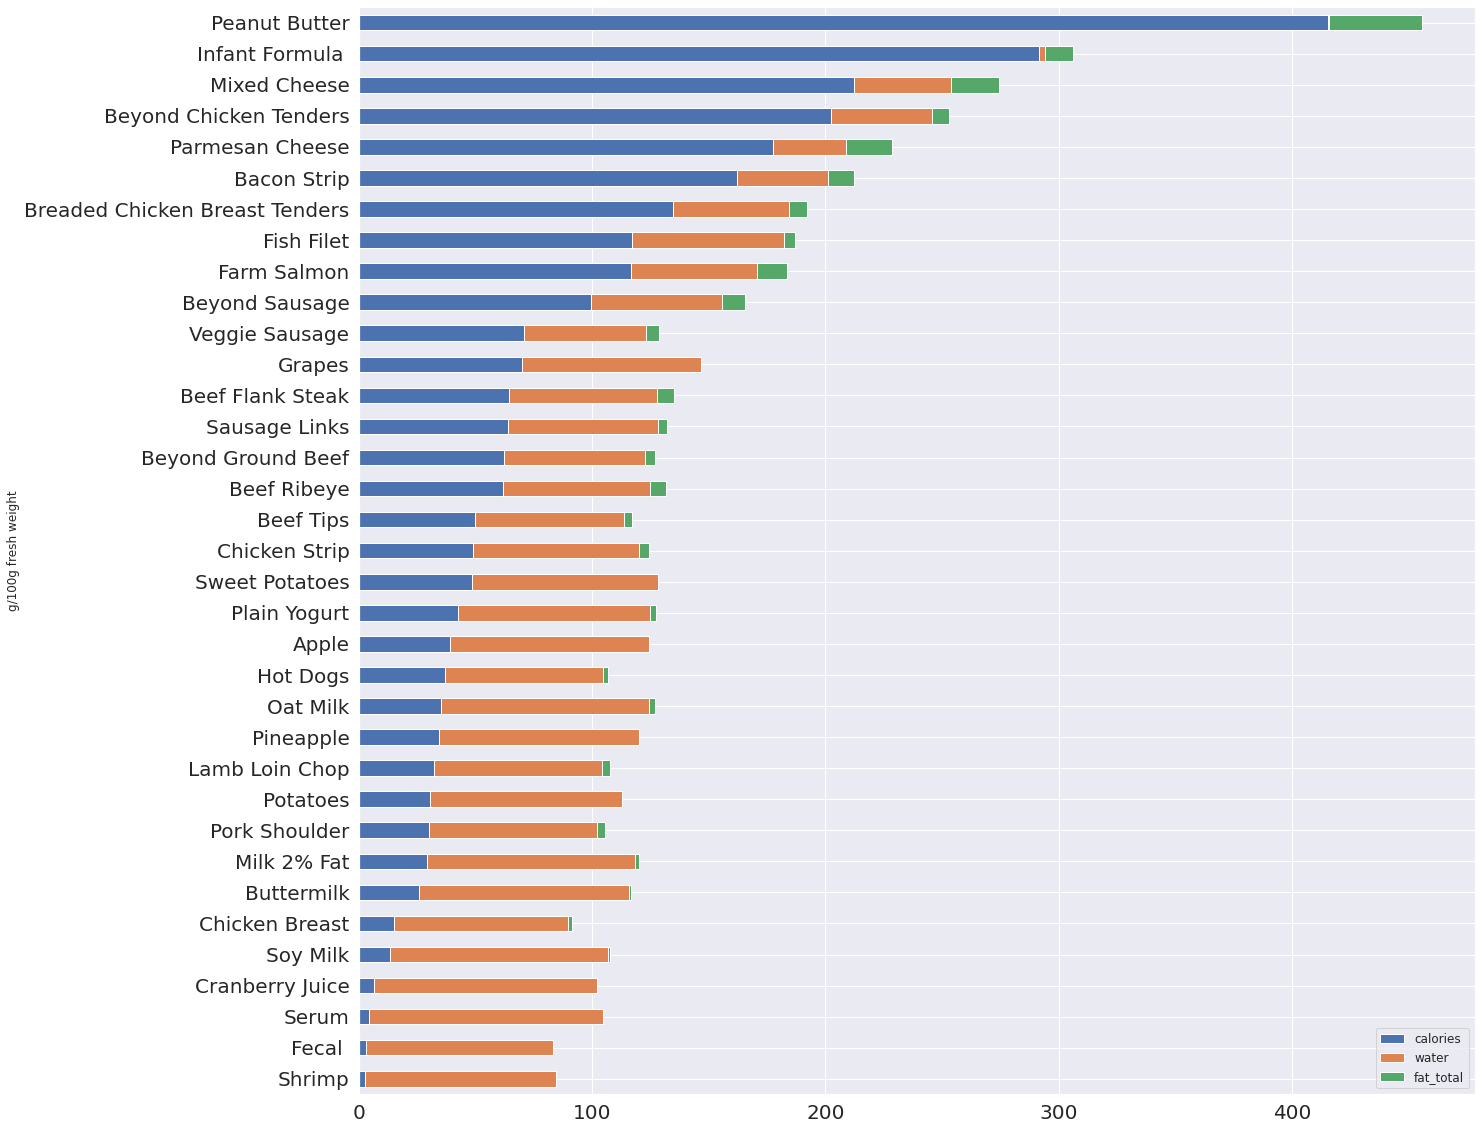

In [162]:
df[["calories","water","fat_total"]].sort_values(by="calories").plot(kind="barh",figsize=(20,20),stacked=True)
plt.legend(prop={"size":12})
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("g/100g fresh weight")
plt.show()

Task1: bar plot of carbohydrate_total and free saccharides_total 

https://www.google.com/url?sa=i&url=https%3A%2F%2Fsharkcoder.com%2Fdata-visualization%2Fmpl-double-bar&psig=AOvVaw1CGw-TC5Dr202lq0JHgivn&ust=1668673374279000&source=images&cd=vfe&ved=0CA8QjRxqFwoTCNCL6e-isvsCFQAAAAAdAAAAABAJ

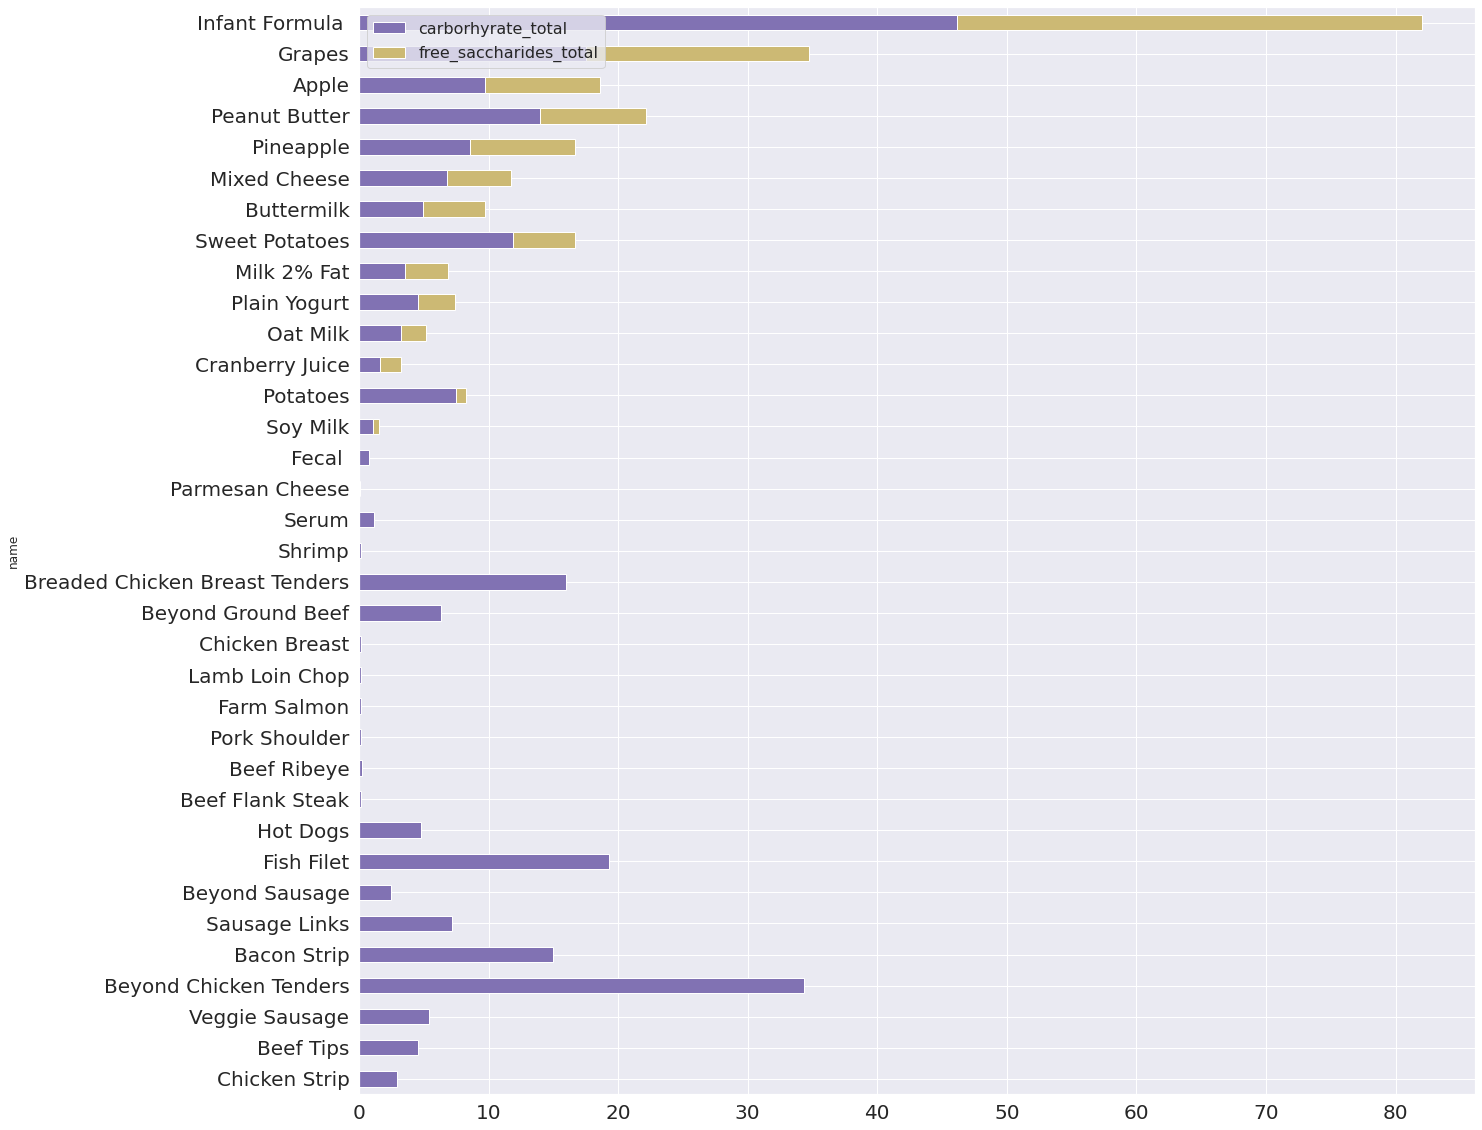

In [163]:
df.index=df.name
sns.set_theme(style="darkgrid")
df[["carborhyrate_total","free_saccharides_total"]].sort_values(by="free_saccharides_total").plot(kind="barh",figsize=(20,20),color=["m","y"],stacked=True)
plt.legend(loc=2,prop={"size":16})
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

Task 2: stack plot of "fructose_free', 'glucose_free',
       'sucrose_free', 'maltose_free', 'lactose_free', 'kestose_free',
       'raffinose_free', 'kestotetraose_free', 'ketopentaose_free',
       'maltopentaose_free', 'maltotetraose_free', 'stachyose_free',
       'maltohexaose_free', 'glucose_pm', 'galactose_pm',
       'fructose_pm', 'xylose_pm', 'arabinose_pm', 'fucose_pm', 'rhamnose_pm',
       'GlcA_pm', 'GalA_pm', 'mannose_pm', 'ribose_pm'
       
    range from highest to lowest example below
    please mention the variable name on the basis of which you want to sort the table

https://cloud.google.com/static/looker/docs/images/new-dashboard-example-2206.png

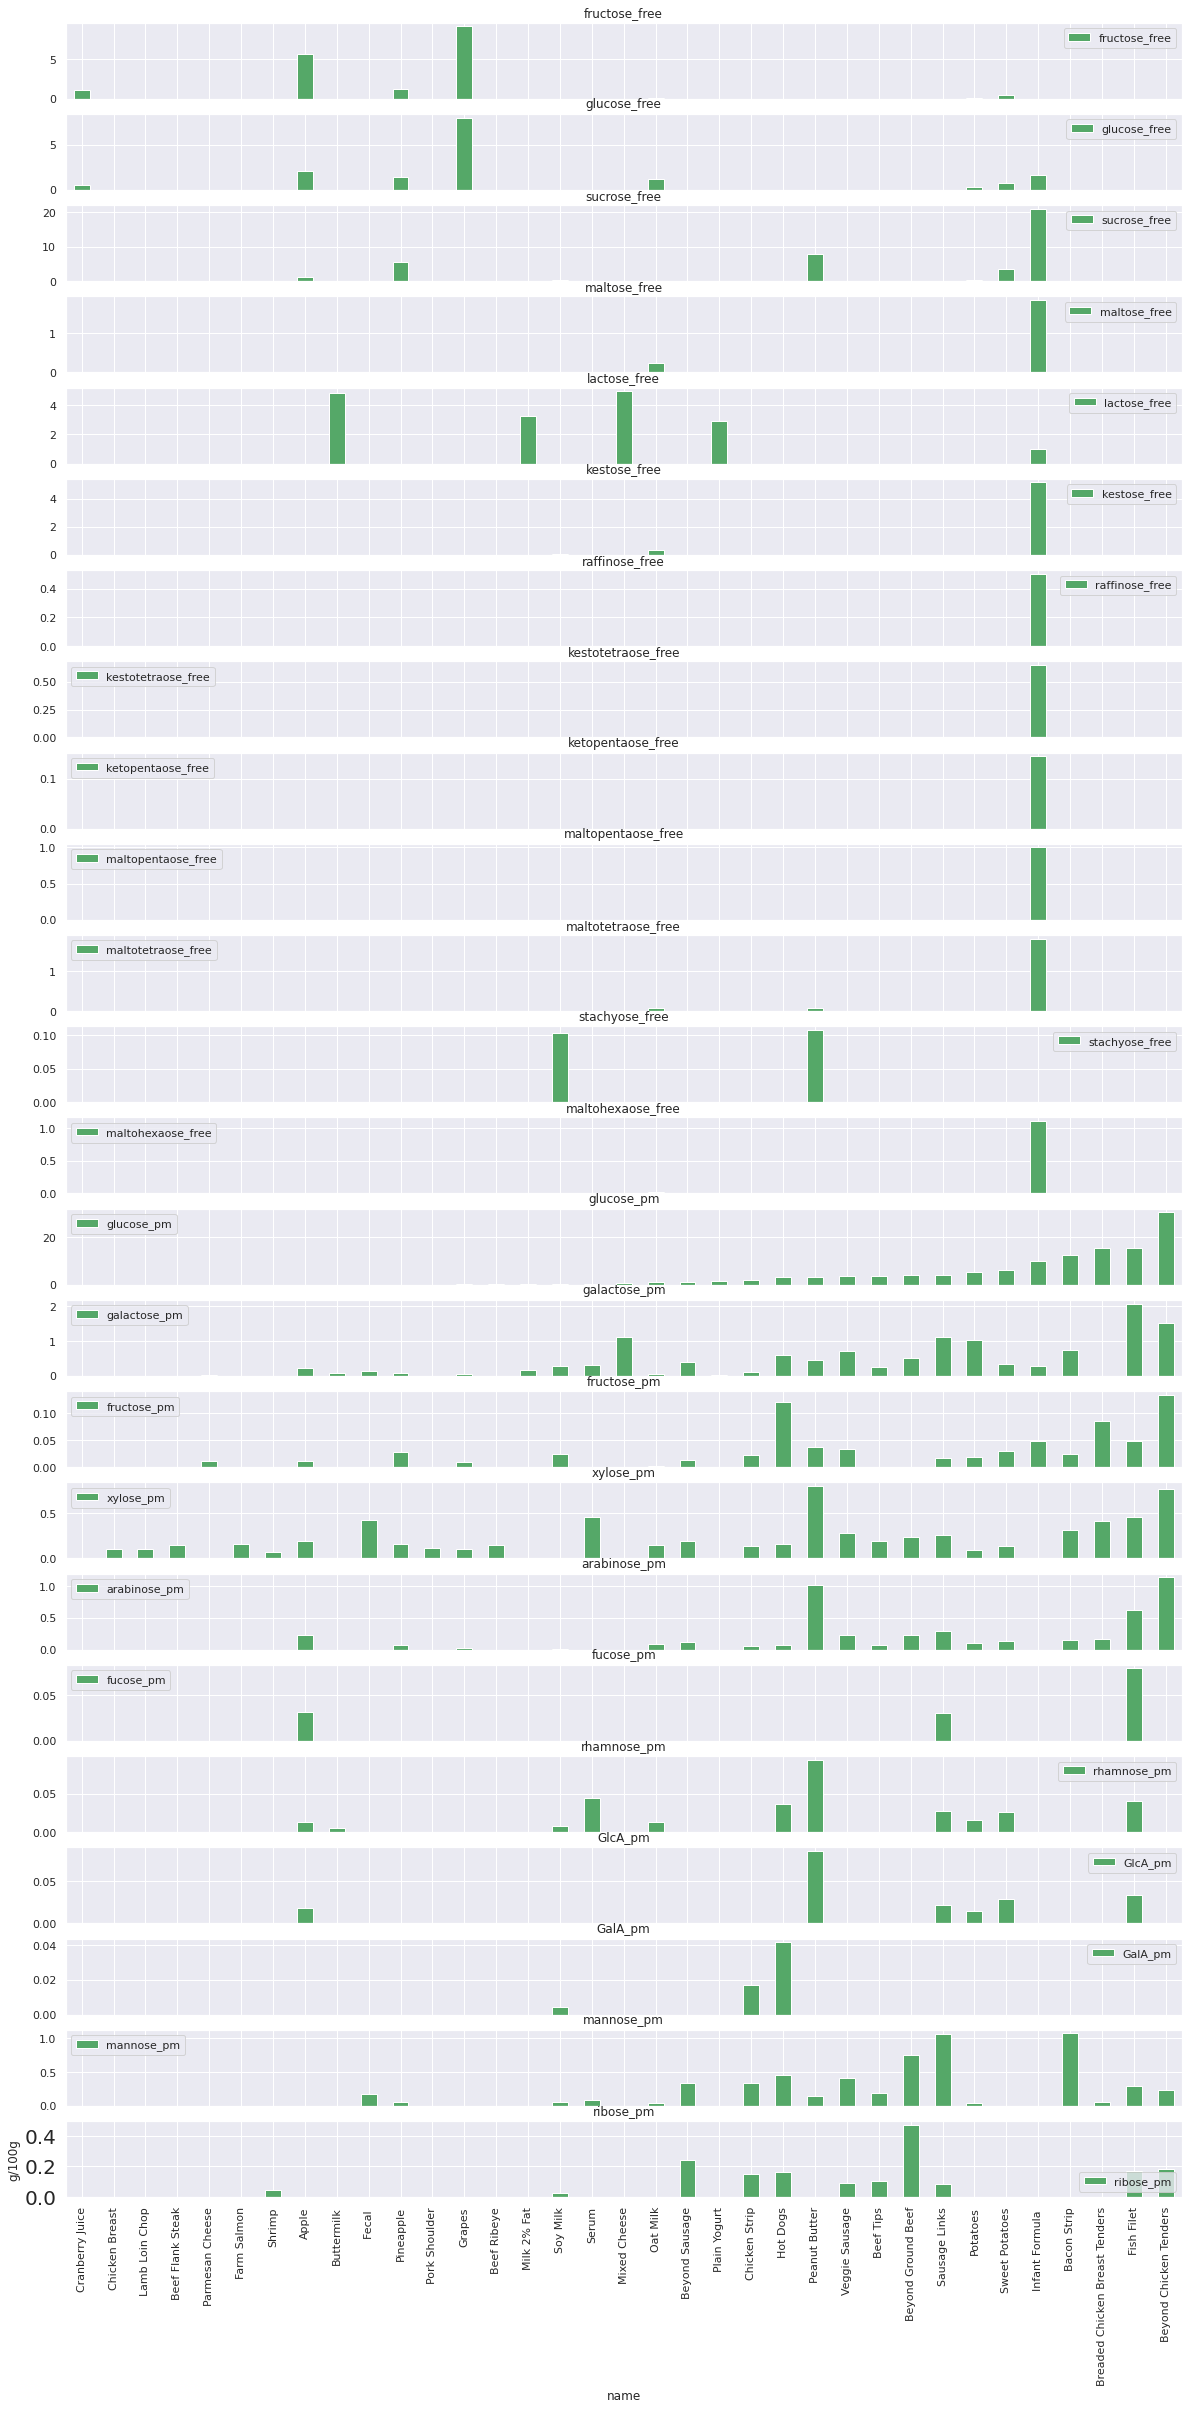

In [188]:
df2 = df[["fructose_free", 'glucose_free',
       'sucrose_free', 'maltose_free', 'lactose_free', 'kestose_free',
       'raffinose_free', 'kestotetraose_free', 'ketopentaose_free',
       'maltopentaose_free', 'maltotetraose_free', 'stachyose_free',
       'maltohexaose_free', 'glucose_pm', 'galactose_pm',
       'fructose_pm', 'xylose_pm', 'arabinose_pm', 'fucose_pm', 'rhamnose_pm',
       'GlcA_pm', 'GalA_pm', 'mannose_pm', 'ribose_pm']]
df2.sort_values(by="glucose_pm").plot(kind="bar",stacked=True,figsize=(20,40),
                                                    color=["g"]#,"r","c","m","y","b","blue","orange","green","red",
                                                   #"purple","pink","brown","gray","olive","cyan","navy","lime","tan"]
                                      ,subplots=True)
plt.legend(loc=4,prop={"size":11},ncol=4)
plt.yticks(fontsize=20)
plt.ylabel("g/100g")
plt.show()

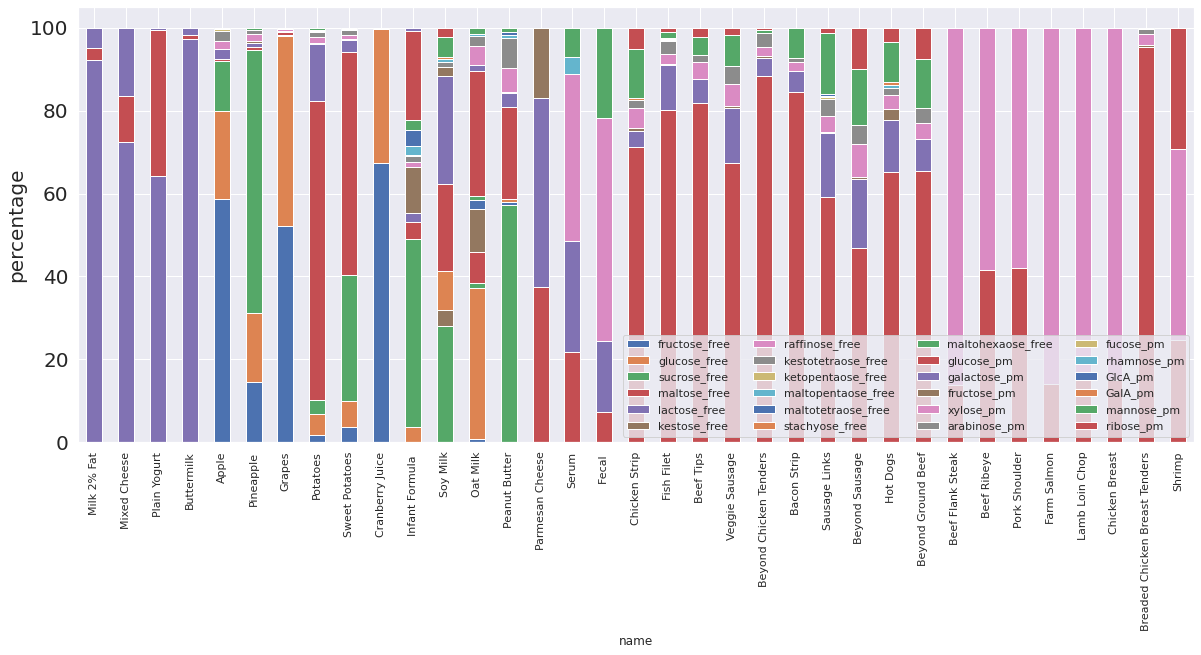

In [184]:
sum = df2.sum(axis=1)
df3 = pd.DataFrame()
for a in df2.columns:
    df3[a]=(df2[a]/sum)*100
df3.plot(kind="bar",figsize=(20,8),stacked=True)
plt.legend(loc=4,prop={"size":11},ncol=4)
plt.yticks(fontsize=20)
plt.ylabel("percentage",fontsize=20)
plt.show()

# **Overall Macronutrient Analysis**

Task1: group food based on catergoies 
Grouping the data into categories can give us the total count of all metrics and thus we can analyse the categories.
Food group = Fruit & Vegetables, Cereals & Grains, Dariy Products,  Nuts & Seeds, Meat, Seafood, Fish, 

In [189]:
df.index

Index(['Milk 2% Fat', 'Mixed Cheese', 'Plain Yogurt', 'Buttermilk', 'Apple',
       'Pineapple', 'Grapes', 'Potatoes', 'Sweet Potatoes', 'Cranberry Juice',
       'Infant Formula ', 'Soy Milk', 'Oat Milk', 'Peanut Butter',
       'Parmesan Cheese', 'Serum', 'Fecal ', 'Chicken Strip', 'Fish Filet',
       'Beef Tips', 'Veggie Sausage', 'Beyond Chicken Tenders', 'Bacon Strip',
       'Sausage Links', 'Beyond Sausage', 'Hot Dogs', 'Beyond Ground Beef',
       'Beef Flank Steak', 'Beef Ribeye', 'Pork Shoulder', 'Farm Salmon',
       'Lamb Loin Chop', 'Chicken Breast', 'Breaded Chicken Breast Tenders',
       'Shrimp'],
      dtype='object', name='name')

In [112]:
df["food_group"]=["Dairy","Dairy","Dairy","Dairy","Fruit",
                  "Fruit","Fruit","Vegetables","Vegetables","Fruit",
                 "Dairy","Dairy","Vegetables","Protein",
                 "Dairy","Protein","Protein","Dairy","Dairy",
                 "Dairy","Vegetables","Dairy","Protein",
                 "Dairy","Dairy","Dairy","Dairy",
                 "Dairy","Dairy","Dairy","Dairy",
                  "Dairy","Dairy","Dairy","Dairy"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


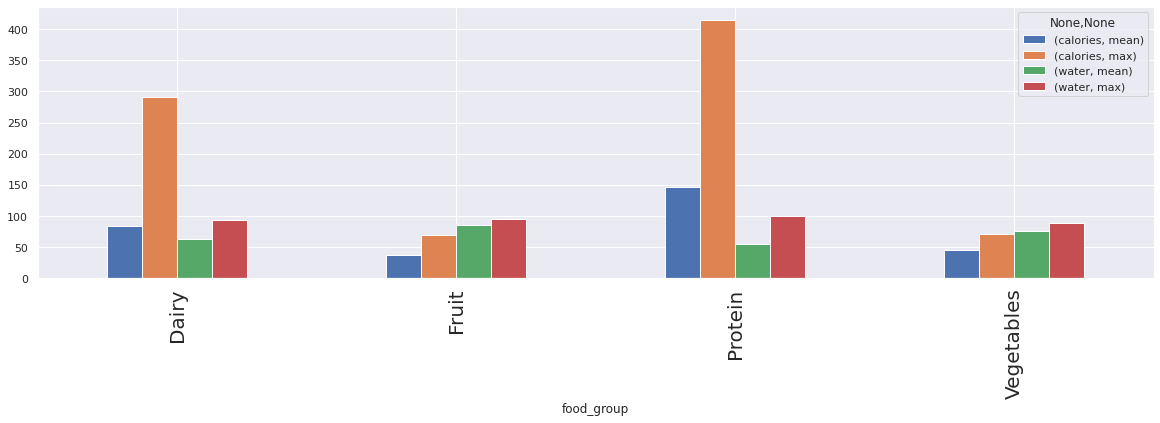

In [113]:
df.groupby("food_group")["calories","water"].agg(["mean","max"]).plot(kind="bar",figsize=(20,5))
plt.xticks(fontsize=20)
plt.show()

Task2: create Ternary plot of group foods base on proteins, fats, carbs

examples https://unidentifiedsignalsource.wordpress.com/2019/04/26/macronutrient-data-visualization/